<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch03_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
pip install keras

In [3]:
from keras.datasets import boston_housing #從keras匯入波士頓房價資料集
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() #載入資料並分成訓練和測試

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [4]:
print(train_data.shape) #共有404筆訓練資料，每筆資料有13個數值特徵

(404, 13)


In [5]:
#正規化資料，請注意，要對測試資料進行正規化，必須使用訓練資料集來計算mean和std。
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /=std

In [6]:
from keras import models
from keras import layers
#建立模型
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mae'])
    return model

In [7]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

In [8]:
#使用K折交叉驗證(K-fold cross validation)
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                         axis=0)
    partial_target_data = np.concatenate([train_targets[:i * num_val_samples],
                                          train_targets[(i + 1) * num_val_samples:]],
                                          axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_target_data,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history) #儲存每折的驗證記錄

processing fold # 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

processing fold # 1
processing fold # 2
processing fold # 3


In [9]:
#建立每一次epoch的平均K折
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[4.297245800495148,
 3.457279324531555,
 3.0948559045791626,
 2.8838711977005005,
 2.8875167965888977,
 2.8390104174613953,
 2.716680645942688,
 2.6419106125831604,
 2.6140487790107727,
 2.718631625175476,
 2.675869941711426,
 2.566514015197754,
 2.6357967853546143,
 2.6194096207618713,
 2.647101938724518,
 2.5088308453559875,
 2.545796662569046,
 2.413841277360916,
 2.406209170818329,
 2.5389843583106995,
 2.385070562362671,
 2.647051513195038,
 2.5304230451583862,
 2.461408257484436,
 2.4388184547424316,
 2.4702850580215454,
 2.44390669465065,
 2.536294639110565,
 2.4003564715385437,
 2.538542926311493,
 2.320877194404602,
 2.450422465801239,
 2.5313647389411926,
 2.6405853629112244,
 2.5876899361610413,
 2.3638328909873962,
 2.557907819747925,
 2.449407398700714,
 2.334193229675293,
 2.3754953145980835,
 2.4349175095558167,
 2.467868387699127,
 2.356740176677704,
 2.374552309513092,
 2.55586576461792,
 2.4696123600006104,
 2.525792181491852,
 2.4281651973724365,
 2.440545082092285,


No handles with labels found to put in legend.


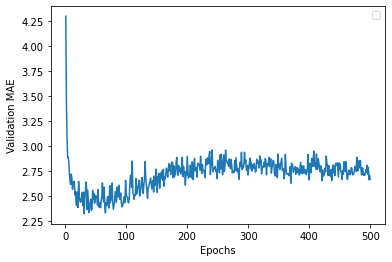

In [10]:
import matplotlib.pyplot as plt
#繪製驗證分數
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()

plt.show()

In [11]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

No handles with labels found to put in legend.


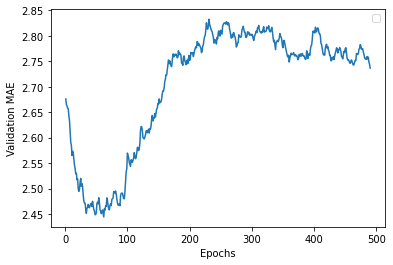

In [12]:
#排除前10個資料點且使用指數移動平均
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()

plt.show()

In [13]:
#使用整個資料進行訓練
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 457us/step


In [14]:
test_mae_score

2.572763204574585